# The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
Apply feature selection techniques

In [ ]:
Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

# Q1. Import libraries and Load the Data file into Python DataFrame and view top 2 rows

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

mpg_df=pd.read_csv('car-mpg.csv')

mpg_df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


# Q2.  Print the datatypes of each column and check for missing values if any. Perform descriptive analysis

In [6]:
print(mpg_df.shape)
print(mpg_df.dtypes)
print(mpg_df.isna().sum())



(398, 10)
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64


In [7]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


mpg_df.groupby('car_type')

In [17]:
print(mpg_df.groupby('car_type').count())
print(mpg_df.groupby('origin').count())
print(mpg_df.origin.unique())
print(mpg_df.car_type.unique())
print(mpg_df.origin.count())
print(mpg_df.car_type.count())

          mpg  cyl  disp   hp   wt  acc   yr  origin  car_name
car_type                                                      
0         187  187   187  187  187  187  187     187       187
1         211  211   211  211  211  211  211     211       211
        mpg  cyl  disp   hp   wt  acc   yr  car_type  car_name
origin                                                        
1       249  249   249  249  249  249  249       249       249
2        70   70    70   70   70   70   70        70        70
3        79   79    79   79   79   79   79        79        79
[1 3 2]
[0 1]
398
398


In [19]:
mpg_df=mpg_df.drop('car_name', axis=1)


In [22]:
mpg_df=mpg_df.replace('?',nm.nan)

In [24]:
print(mpg_df.shape)
mpg_df=mpg_df.dropna()
print(mpg_df.shape)

(392, 9)
(392, 9)


In [28]:
mpg_df['hp']=mpg_df['hp'].astype('float64')
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.525510
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.499987
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


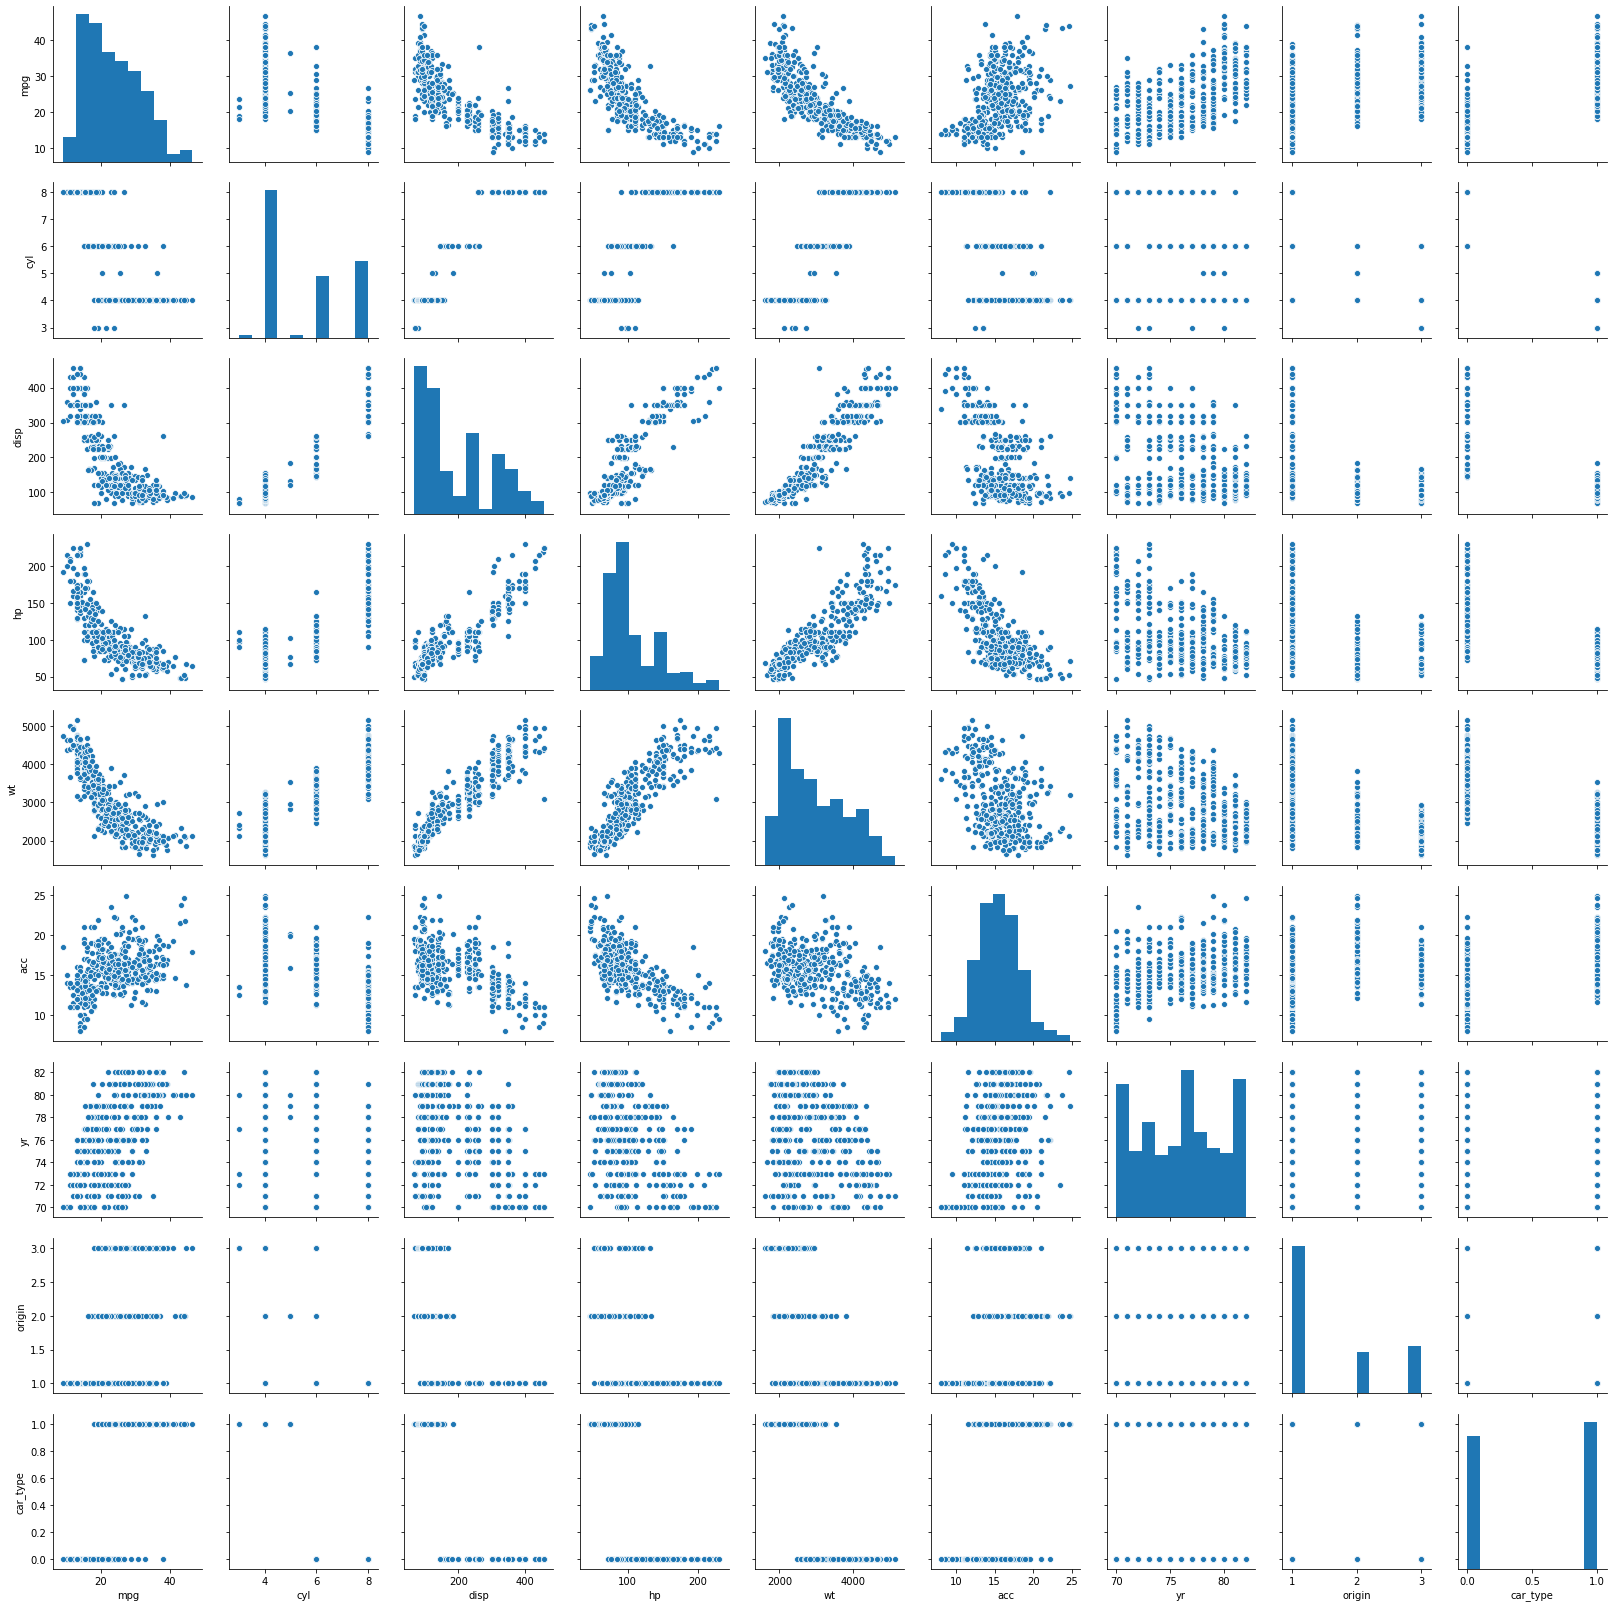

In [30]:
sns.pairplot(mpg_df)

# Q3. Split the dataset into training and test sets and fit the model. Also calculate R square

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(mpg_df.drop('mpg',axis=1), mpg_df['mpg'],test_size=0.30, random_state=1)

rm=LinearRegression()
rm.fit(x_train,y_train)
print(rm.score(x_train,y_train))
print(rm.score(x_test,y_test))

0.8412007260219844
0.8353914614172089


# Q4. Calculate Mean Square Error for both train and test set

In [50]:
pridectmpg = rm.predict(x_train)
print(mean_squared_error(pridectmpg,y_train))

pridectmpgT = rm.predict(x_test)
print(mean_squared_error(pridectmpgT,y_test))



9.257306432005958
10.943749244976196


In [68]:
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=4, include_bias=False)
xploy_train=poly.fit_transform(x_train)
xploy_train[0:2]
x_train.head(2)

,cyl,disp,hp,wt,acc,yr,origin,car_type
335,4,122.0,88.0,2500,15.1,80,2,1
397,4,119.0,82.0,2720,19.4,82,1,1


In [69]:
rm2=rm.fit(xploy_train,y_train)

print(rm2.score(xploy_train,y_train))


0.9990571488571253


# Q5. Evaluate the model using cross validation

In [74]:
from sklearn import model_selection
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)
model=LinearRegression();
x_train.head()


,cyl,disp,hp,wt,acc,yr,origin,car_type
335,4,122.0,88.0,2500,15.1,80,2,1
397,4,119.0,82.0,2720,19.4,82,1,1
394,4,97.0,52.0,2130,24.6,82,2,1
29,4,97.0,88.0,2130,14.5,71,3,1
275,6,163.0,125.0,3140,13.6,78,2,0


In [86]:
results= model_selection.cross_val_score(model,x_train,y_train, cv=kfold)
print(results.mean())
print(results.std())

print("Mean Square Error: %.3f (%.3f)"% (-results.mean(), results.std()))

0.7997878392026567
0.12470388829732112
Mean Square Error: -0.800 (0.125)


# Q6. Apply Feature selection method to find which features fits well and do the plotting

In [89]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (274, 8) (274,)
Testing dataset shape: (118, 8) (118,)


In [94]:
linR = LinearRegression()
sfs1=sfs(linR, k_features=5, forward=True, scoring ='r2', cv=5)
sfs1 = sfs1.fit(x_train.values, y_train.values)

sfs1.get_metric_dict()



{1: {'feature_idx': (3,),
  'cv_scores': array([0.54362205, 0.63041291, 0.67296379, 0.72523906, 0.83173358]),
  'avg_score': 0.6807942791247164,
  'feature_names': ('3',),
  'ci_bound': 0.12351348849845512,
  'std_dev': 0.09609769021095473,
  'std_err': 0.048048845105477356},
 2: {'feature_idx': (3, 5),
  'cv_scores': array([0.76226899, 0.77835551, 0.81740483, 0.79369266, 0.820072  ]),
  'avg_score': 0.7943587984415493,
  'feature_names': ('3', '5'),
  'ci_bound': 0.028616668110338292,
  'std_dev': 0.022264739992113432,
  'std_err': 0.011132369996056716},
 3: {'feature_idx': (3, 5, 7),
  'cv_scores': array([0.77658548, 0.77907703, 0.82930666, 0.81516195, 0.83005954]),
  'avg_score': 0.8060381308667253,
  'feature_names': ('3', '5', '7'),
  'ci_bound': 0.030394105814325226,
  'std_dev': 0.023647646911215986,
  'std_err': 0.011823823455607991},
 4: {'feature_idx': (0, 3, 5, 7),
  'cv_scores': array([0.79164192, 0.79408855, 0.81163837, 0.83667329, 0.8569699 ]),
  'avg_score': 0.8182024052

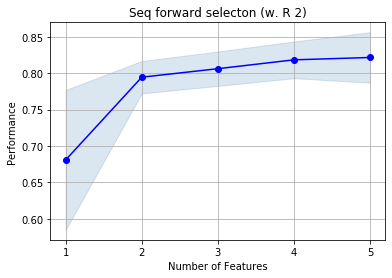

In [98]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig=plot_sfs(sfs1.get_metric_dict())
plt.title('Seq forward selecton (w. R 2)')
plt.grid()
plt.show()


In [104]:
columnList= list(x_train.columns)
print(columnList)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type']
[0, 3, 5, 6, 7]


In [105]:
subsetColumnList = [columnList[i] for i in feat_cols]
print(subsetColumnList)

['cyl', 'wt', 'yr', 'origin', 'car_type']


# Q7. Now build full model with selected features

In [106]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))


Training accuracy on selected features: 0.830
Testing accuracy on selected features: 0.837


# Q8. Build full model on all features as comparison